<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/CNN/04_workshop_NLP_sentiment_analysis_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from keras.datasets import imdb

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
# Se une la validacion de los datos
X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)

In [4]:
np.unique(y)

array([0, 1])

In [5]:
#Palabras unicas
print(len(np.unique(np.hstack(X))))

88585


Media de palabras: 234.76 (172.911495)


(array([3.5259e+04, 1.0799e+04, 2.7610e+03, 1.0160e+03, 1.4500e+02,
        8.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([   7. ,  255.7,  504.4,  753.1, 1001.8, 1250.5, 1499.2, 1747.9,
        1996.6, 2245.3, 2494. ]),
 <a list of 10 Patch objects>)

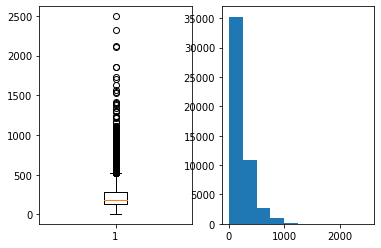

In [6]:
result = [len(i) for i in X]
print('Media de palabras: %.2f (%f)' % (np.mean(result), np.std(result)))
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)

# Incrustar palabras
- Se trata de una técnica en la que las palabras se codifican con vectores de valor real en un espacio de alta dimensión, donde la similitud entre palabras en términos de significado se traduce en cercanía en el espacio vectorial.

- Las palabras discretas se asignan a vectores de números continuos

Keras proporciona una forma conveniente de convertir representaciones enteras positivas de palabras en una incrustación de palabras mediante una capa Embedding que toma argumento que:

- Define el mapeo, incluido el número máximo de palabras esperadas, también llamado tamaño vocabulario
- También le permite especificar la dimensionalidad de cada vector de palabra, denominada dimension de salida

Supongamos que solo nos interesan las primeras 5000 palabras más utilizadas en el conjunto de datos. Por lo tanto:

- El tamaño sera 5000
- El vector de 32 dimensiones para representar cada palabra
- Se puede optar por limitar la extension maxima de la reseña a 500, truncando la reseña mas larga y rellenando las reseñas mas corta con valores 0

In [7]:
vocab = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [8]:
#Limitar las reseñas a 500 palabras
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

#Diseño del modelo
1. Capa Embedding como entrada, estableciendo el vocabulario en 5000, el tamaño del vector de la palabra en 32 dimensiones y la longitud de entrada en 500
2. La salida de esta primera capa sera una matriz de tamaño 32x500
3. Capa Flatten para la salida de las capas embedding a una dimensión
4. Capa oculta densa de 250 neuronas con una función de activación ReLu
5. La capa de salida tiene 1 neurona con una activación sigmoidea para generar valore de 0 y 1
6. Funciones de perdida logaritmica y se optimiza mediante ADAM

In [9]:
model = Sequential()
model.add(Embedding(vocab, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

Epoch 1/2
196/196 - 19s - loss: 0.4985 - accuracy: 0.7172 - val_loss: 0.2962 - val_accuracy: 0.8765
Epoch 2/2
196/196 - 2s - loss: 0.1830 - accuracy: 0.9306 - val_loss: 0.3192 - val_accuracy: 0.8689


In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print("MLP Accuracy: %.2f%%" % (score[1]*100))

MLP Accuracy: 86.89%


CNN
1. Despues de la capa de entrada Embedding se inserta una capa Conv1D
  - La capa convolucional tiene 32 mapas de caracteristicas y lee representaciones de palabras embebidas 3 elementos vectoriales de la palabra embebida a la vez
2. Capa MaxPooling1D de 2x2

In [17]:
model = Sequential()
model.add(Embedding(vocab, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [18]:
#Ajuste
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

Epoch 1/2
196/196 - 33s - loss: 0.4564 - accuracy: 0.7552 - val_loss: 0.2941 - val_accuracy: 0.8758
Epoch 2/2
196/196 - 3s - loss: 0.2203 - accuracy: 0.9144 - val_loss: 0.2730 - val_accuracy: 0.8849


In [19]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (score[1]*100))

CNN Accuracy: 86.89%
